In [6]:
import codecs
import pandas as pd
from pyvi import ViTokenizer
from underthesea import word_tokenize

data_vnexpress = pd.read_csv(codecs.open('filtered_data/vnexpress.csv','r','utf-8'))
data_dantri = pd.read_csv(codecs.open('filtered_data/dantri.csv','r','utf-8'))
data_vietnamnet = pd.read_csv(codecs.open('filtered_data/vietnamnet.csv','r','utf-8'))

In [3]:
data_vnexpress.content = data_vnexpress.content.str.replace(pat="(\._)", regex=True,repl=" ")

data_vnexpress.content = data_vnexpress.content.str.replace(pat="(\d*)", regex=True,repl="")

data_vnexpress.content = data_vnexpress.content.str.replace(pat="(\s+[a-zA-Z]\s+)", regex=True,repl=" ")

data_vnexpress.content = data_vnexpress.content.str.replace(pat="(\W)", regex=True,repl=" ")

data_vnexpress.content = data_vnexpress.content.str.replace(pat=r"(\s+)", regex=True,repl=" ")

data_vnexpress.content = data_vnexpress.content.str.lower()

data_vnexpress.to_csv("train_data/vnexpress.csv",index=False)

In [39]:
data_vietnamnet.content = data_vietnamnet.content.str.replace(pat="(\._)", regex=True,repl=" ")

data_vietnamnet.content = data_vietnamnet.content.str.replace(pat="(\d*)", regex=True,repl="")

data_vietnamnet.content = data_vietnamnet.content.str.replace(pat="(\s+[a-zA-Z]\s+)", regex=True,repl=" ")

data_vietnamnet.content = data_vietnamnet.content.str.replace(pat="(\W)", regex=True,repl=" ")

data_vietnamnet.content = data_vietnamnet.content.str.replace(pat=r"(\s+)", regex=True,repl=" ")

data_vietnamnet.content = data_vietnamnet.content.str.lower()

data_vietnamnet.to_csv("train_data/vietnamnet.csv",index=False)

In [4]:
data_dantri.content = data_dantri.content.str.replace(pat="(\._)", regex=True,repl=" ")

data_dantri.content = data_dantri.content.str.replace(pat="(\d*)", regex=True,repl="")

data_dantri.content = data_dantri.content.str.replace(pat="(\s+[a-zA-Z]\s+)", regex=True,repl=" ")

data_dantri.content = data_dantri.content.str.replace(pat="(\W)", regex=True,repl=" ")

data_dantri.content = data_dantri.content.str.replace(pat=r"(\s+)", regex=True,repl=" ")

data_dantri.content = data_dantri.content.str.lower()

data_dantri.to_csv("train_data/data_dantri.csv",index=False)

In [2]:
import pandas as pd
import codecs
data = pd.read_csv(
    codecs.open('train_data/data_dantri.csv', 'r', 'utf-8'))
data = data.append(pd.read_csv(
    codecs.open('train_data/vnexpress.csv', 'r', 'utf-8')),ignore_index=True)
data.to_csv("train_data/train_data.csv",index=False)

In [73]:
labels = [
('Chinh tri Xa hoi', 0),
('Cong Nghe', 1),
('Doi Song', 2),
('Du Lich', 3),
('Van Hoa - Giai Tri', 4),
('Giao Duc', 5),
('Khoa hoc', 6),
('Kinh doanh', 7),
('Phap Luat ', 8),
('Suc Khoe', 9),
('The Gioi', 10),
('The Thao', 11),
('Xe', 12),
]

import pandas as pd
import codecs
from sklearn.model_selection import train_test_split  
from sklearn.utils import shuffle

data = pd.read_csv(
    codecs.open('train_data/train_data.csv', 'r', 'utf-8'))

df = data[(data['label'] == 6.0) | (data['label'] == 12.0)]
df=df.append(df, ignore_index=True)
df = shuffle(df)
data = data.append(df,ignore_index=True)

data = data.loc[data.sample(frac=1).groupby('label').cumcount() < 3500]
         
X, y = data.content, data.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

for label, idx in labels:
    print('%d. %s: %d' % (idx, label,len(data[data.label == idx])))
print('----')
for label, idx in labels:
    print('%d. %s: %d' % (idx, label,len(y_train[y_train == idx])))


0. Chinh tri Xa hoi: 3500
1. Cong Nghe: 3500
2. Doi Song: 3413
3. Du Lich: 3500
4. Van Hoa - Giai Tri: 3500
5. Giao Duc: 3500
6. Khoa hoc: 3500
7. Kinh doanh: 3500
8. Phap Luat : 3500
9. Suc Khoe: 3500
10. The Gioi: 3500
11. The Thao: 3500
12. Xe: 3500
----
0. Chinh tri Xa hoi: 2495
1. Cong Nghe: 2416
2. Doi Song: 2394
3. Du Lich: 2419
4. Van Hoa - Giai Tri: 2475
5. Giao Duc: 2457
6. Khoa hoc: 2428
7. Kinh doanh: 2434
8. Phap Luat : 2450
9. Suc Khoe: 2442
10. The Gioi: 2469
11. The Thao: 2506
12. Xe: 2404


In [ ]:
from model.nb_model import NBModel
import pickle
model = NBModel()
clf = model.clf.fit(X_train,y_train)
pkl_filename = "nb_model.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(clf, file)

In [2]:
from model.randomforest_model import RandomForestModel
import pickle
model = RandomForestModel()
clf = model.clf.fit(X_train,y_train)
pkl_filename = "randomforest_model.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(clf, file)

In [ ]:
from model.mlp_model import    MLPModel
import pickle

start = time.time()

model = MLPModel()
clf = model.clf.fit(X_train,y_train)
pkl_filename = "mlp_model.pkl"  

print(time.time() - start)

with open(pkl_filename, 'wb') as file:  
    pickle.dump(clf, file)

In [41]:
import time
start = time.time()
from model.svm_model import SVMModel
model = SVMModel('rbf')
clf = model.clf.fit(X_train,y_train)

print(time.time() - start)

import pickle
pkl_filename = "svm_model.pkl"  
with open(pkl_filename, 'wb') as file: 
    pickle.dump(clf, file)

21.10761547088623


In [64]:
import pickle
pkl_filename = "mlp_model.pkl"  
with open(pkl_filename, 'rb') as file: 
    clf = pickle.load(file)

In [3]:
import pickle
pkl_filename = "randomforest_model.pkl"
with open(pkl_filename, 'rb') as file:  
    clf = pickle.load(file)

In [2]:
import pickle
pkl_filename = "svm_model.pkl"
with open(pkl_filename, 'rb') as file:  
    clf = pickle.load(file)

In [62]:
import pandas as pd
import codecs
from sklearn.utils import shuffle
labels = [
('Chinh tri Xa hoi', 0),
('Cong Nghe', 1),
('Doi Song', 2),
('Du Lich', 3),
('Van Hoa - Giai Tri', 4),
('Giao Duc', 5),
('Khoa hoc', 6),
('Kinh doanh', 7),
('Phap Luat ', 8),
('Suc Khoe', 9),
('The Gioi', 10),
('The Thao', 11),
('Xe', 12),
]
data = pd.read_csv(
    codecs.open('train_data/train_data.csv', 'r', 'utf-8'))

df = data[(data['label'] == 6.0) | (data['label'] == 12.0) | (data['label'] == 1.0) | (data['label'] == 2.0) ]
df=df.append(df, ignore_index=True)
df = shuffle(df)
data = data.append(df,ignore_index=True)

data = data.loc[data.sample(frac=1).groupby('label').cumcount() > 3500]

data = data.append(pd.read_csv(codecs.open('train_data/vietnamnet.csv', 'r', 'utf-8')) ,ignore_index=True )

data = data.loc[data.sample(frac=1).groupby('label').cumcount() < 500]

for label, idx in labels:
    print('%d. %s: %d' % (idx, label,len(data[data.label == idx])))
X_test, y_test = data.content, data.label

0. Chinh tri Xa hoi: 500
1. Cong Nghe: 500
2. Doi Song: 500
3. Du Lich: 500
4. Van Hoa - Giai Tri: 500
5. Giao Duc: 500
6. Khoa hoc: 500
7. Kinh doanh: 500
8. Phap Luat : 500
9. Suc Khoe: 500
10. The Gioi: 500
11. The Thao: 500
12. Xe: 500


In [226]:
x = pd.DataFrame(X_test)
x['predict'] = y_pred.tolist()
x['label']=y_test.tolist()

In [74]:
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

[[ 886    1   18   13    1   12    3   27   21    6    9    2    6]
 [   1 1032    8    1    6    1    6   17    3    3    5    1    0]
 [  11    4  910   17    5    8    1   24    1   32    2    1    3]
 [   1    4   18 1008   11    0    6   14    0    8    8    0    3]
 [   3    2   18   12  957    2    6    2    0   14    4    2    3]
 [  15    7   18    8    2  965    6    5    3    9    4    1    0]
 [   4   10    2    7    1    3 1021    1    1   19    3    0    0]
 [  25   16   63   16    8    2    3  884   11    6   13    1   18]
 [  36    2    6    1    0    1    4    6  984    6    3    1    0]
 [   5    2   33    0    9    4   14    0    1  988    0    1    1]
 [  17   11    3   14    8    5   20   19   10    4  911    2    7]
 [   0    1    5    0    1    0    0    4    0    3    1  975    4]
 [   3    0    0    0    2    0    0    0    0    0    0    0 1091]]
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      1005
      

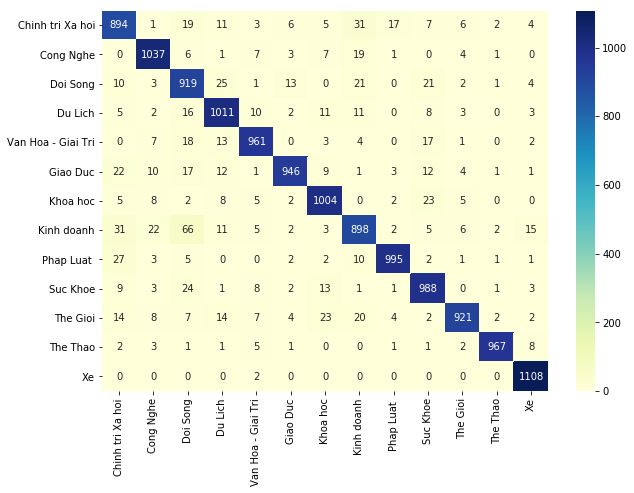

In [72]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(array, index = [i[0] for i in labels],
                  columns = [i[0] for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,fmt="d",cmap="YlGnBu")

In [248]:
text = input()

from underthesea import word_tokenize


test_data = [{"content": text}
]

data = pd.DataFrame(test_data)
data['content'] = data.apply(lambda row: word_tokenize(row['content'], format="text"), axis=1)
print(data.loc[0]['content'])
labels[int(clf.predict(data['content']))][0]
# clf.predict_proba(data['content'])[0]

Chiều 9/5, lễ kỷ niệm 74 năm ngày Chiến thắng Phát xít Đức đã được tổ chức hoành tráng ở Quảng trường Đỏ tại Moscow, Nga.  Phi công nói nguyên nhân khiến máy bay Nga bốc cháy Tiếp viên hàng không Nga hy sinh để cứu hành khách Căn cứ không quân Nga bất ngờ hứng mưa tên lửa Trong lễ duyệt binh, quân đội Nga đã giới thiệu tới công chúng rất nhiều loại vũ khí thuộc thế hệ mới như xe tăng T-14 Armata, Kurganets-25… Trong đó, có cả tên lửa hạt nhân liên lục địa RS-24 Yars hiện đại bậc nhất có trong biên chế Lực lượng Tên lửa Chiến lược Nga hiện nay .  Dòng tên lửa Nga có thể làm bẽ mặt lá chắn đối phương Tên lửa hạt nhân liên lục địa RS-24 Yars tham gia duyệt binh 9/5. Ảnh: RT Tên lửa hạt nhân liên lục địa RS-24 Yars là sản phẩm của Viện Công nghệ Nhiệt Moscow, được thử nghiệm lần đầu tháng 9/2007 và được đưa vào biên chế quân đội nước này trong tháng 7/2010. Kết quả các cuộc thử nghiệm trước đó cho thấy, RS-24 là một trong những tên lửa đạn đạo hạt nhân khủng khiếp nhất mà người Nga từng ch

'The Gioi'

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

In [252]:
print(model.clf)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.7, max_features=None, min_df=5,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['a_lô', 'a...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])


In [55]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
f = open('vietnamese-stopwords-dash.txt', 'r')
sw = f.read().splitlines()
f.close()

cnt =CountVectorizer(min_df=5, max_df=0.7, stop_words=sw)
Y= cnt.fit(X_test).vocabulary_
tfidf = TfidfTransformer()
X= tfidf.fit_transform(cnt.fit_transform(X_test))
print(type(Y))

<class 'dict'>


In [56]:
print(len(cnt.fit(X_test).vocabulary_))
for i in range(len(X[1].indices)):
    print(list(Y.keys())[list(Y.values()).index(X[1].indices[i])])
    print(X[1].data[i])
print(X[1].data)

9716
ảnh
0.027417031196053557
đời_mới
0.09212226404787718
đọc
0.19411148259744174
định
0.058964562221564
đặt_hàng
0.06443270531396875
đơn
0.04814710055194825
đóng_góp
0.05108001847490825
đánh_bại
0.058964562221564
điện_thoại_di_động
0.07457377464723589
điều_hành
0.09864885565747489
đi
0.020296422018773002
ý_tưởng
0.054743382579785095
ý_kiến
0.04260411777512213
áp_lực
0.04538393819062188
áp_dụng
0.04047924901143244
xs
0.16614023187062096
xr
0.08545114233561897
usd
0.06740018800254059
tỷ
0.06042555677199286
tự_tin
0.05310881586721655
tỉnh
0.0732781727093034
tệ_hại
0.08682709685105187
tập_luyện
0.19572229944011446
tò_mò
0.06367174313812946
tìm_kiếm
0.05089345117064614
táo
0.07576181960143531
trở_nên
0.04367810533016853
tràn_đầy
0.07706885844669739
tiến_hành
0.04346661100443855
thức
0.07247978154165988
thế_giới
0.029437835613483853
thú_vị
0.05257131246434905
thói_quen
0.05378445734784215
thành_công
0.07455252195253731
sở_thích
0.06249441586134026
sản_phẩm
0.04170310611565517
samsung
0.1449

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax




Confusion matrix, without normalization
[[259   1  11  13   0   8   3  15  42   5  14   5   0]
 [  2 347   3   1   4   7   0  18   2   1   8   4   0]
 [ 11   6 291  26   9  12   1  30   2  26   2   2   0]
 [  3   0  22 371   7   3   7   2   4   2   9   3   0]
 [  5   0  23  13 329   1   0   0   0   2   3   8   0]
 [  5   1  16   0   5 377   1   0   6   2   2   1   1]
 [  3   7   8   8   2  17 270   9   0  40  12   0   1]
 [ 18  15  33  15   0   3   7 265   9   3   4   1   6]
 [ 14   0   1   0   0   1   0   4 370   2   2   0   1]
 [  7   2   9   1   4   3   5   3   5 363   0   1   0]
 [  7   0  12   9   7   4   5   4  12   2 344   3   1]
 [  1   0   2   2   0   0   0   0   0   1   1 394   0]
 [  8   1   8   1   1   3   0   6   0   2   2   3 210]]


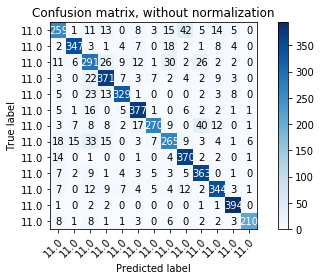

In [14]:
np.set_printoptions(precision=5)
class_names = data_dantri.label

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()